# 🤖 Artificial Intelligence - Assignment 1
## Part C: A* Search and Heuristic Analysis in a Maze

**Objective:** This notebook implements the A* search algorithm and analyzes its performance with three different heuristics:
1.  **Manhattan Distance:** The standard admissible and consistent heuristic.
2.  **Scaled Manhattan (x1.5):** A non-admissible heuristic.
3.  **Inconsistent Heuristic:** An admissible but inconsistent heuristic.

In [27]:
# Step 1: Importing Necessary Libraries
# We'll start by importing the essential Python libraries.
import heapq
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

# Set a modern and clean style for our plots
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['font.size'] = 12

print("Libraries imported and plot style configured successfully! ")

Libraries imported and plot style configured successfully! 


### Step 2: The `MazeExplorer` Class

To keep our code organized and professional, we'll create a `MazeExplorer` class. This class will handle everything related to the maze: storing the grid, finding the start/goal, and running the A* search algorithm. This object-oriented approach is cleaner than using standalone functions.

In [28]:
class MazeExplorer:
    """An object-oriented class to find a path in a maze using A* search."""

    def __init__(self, maze_layout):
        """Initializes the maze explorer with a given layout."""
        # Convert list to a NumPy array for easier handling
        self.grid = np.array(maze_layout, dtype=str)
        self.rows, self.cols = self.grid.shape

        # Automatically find the start ('A') and goal ('B') positions
        self.start_node = self._find_special_char('A')
        self.goal_node = self._find_special_char('B')

        if not self.start_node or not self.goal_node:
            raise ValueError("Start character 'A' or Goal character 'B' not found in the maze layout.")

    def _find_special_char(self, char):
        """Helper to find the coordinates of a character like 'A' or 'B'."""
        for r, row in enumerate(self.grid):
            for c, cell_value in enumerate(row):
                if cell_value == char:
                    return (r, c)
        return None

    def _get_valid_neighbors(self, node):
        """Returns a list of walkable neighbors for a given node."""
        r, c = node
        potential_neighbors = [
            (r, c + 1), # Right
            (r, c - 1), # Left
            (r + 1, c), # Down
            (r - 1, c)  # Up
        ]

        valid_neighbors = []
        for neighbor in potential_neighbors:
            nr, nc = neighbor
            if 0 <= nr < self.rows and 0 <= nc < self.cols and self.grid[nr, nc] != '1':
                valid_neighbors.append(neighbor)
        return valid_neighbors

    def find_path(self, heuristic_function):
        """
        Runs the A* search algorithm to find the path from start to goal.

        Args:
            heuristic_function: The heuristic to use for estimating the cost to the goal.

        Returns:
            A tuple containing (path, cost, number of expanded nodes).
        """
        # The open list (priority queue) stores: (f_score, node)
        open_list = [(heuristic_function(self.start_node, self.goal_node), self.start_node)]

        # Dictionaries to track the path and costs
        came_from = {}
        cost_from_start = {self.start_node: 0} # This is g(n)
        expanded_nodes = 0

        while open_list:
            _, current_node = heapq.heappop(open_list)
            expanded_nodes += 1

            # Goal reached! Reconstruct the path and return results.
            if current_node == self.goal_node:
                path = self._reconstruct_final_path(came_from, current_node)
                return path, cost_from_start[current_node], expanded_nodes

            # Explore neighbors
            for neighbor in self._get_valid_neighbors(current_node):
                # The cost to move to a neighbor is always 1
                new_cost = cost_from_start[current_node] + 1

                if neighbor not in cost_from_start or new_cost < cost_from_start[neighbor]:
                    cost_from_start[neighbor] = new_cost
                    f_score = new_cost + heuristic_function(neighbor, self.goal_node)
                    heapq.heappush(open_list, (f_score, neighbor))
                    came_from[neighbor] = current_node

        return None, float('inf'), expanded_nodes  # No path found

    def _reconstruct_final_path(self, came_from, current):
        """Helper to trace the path back from the goal to the start."""
        path = [current]
        while current in came_from:
            current = came_from[current]
            path.append(current)
        return path[::-1] # Reverse the path to get it from start to goal

### Step 3: Defining the Heuristic Functions

Here, we define the three distinct heuristic functions required by the assignment. Each function takes two arguments (`node` and `goal`) and returns an estimated cost.

In [29]:
def manhattan_heuristic(node, goal):
    """(Admissible & Consistent) Calculates the Manhattan distance |x1-x2| + |y1-y2|."""
    return abs(node[0] - goal[0]) + abs(node[1] - goal[1])

def scaled_manhattan_heuristic(node, goal):
    """(Non-Admissible) An 'aggressive' heuristic that overestimates the cost."""
    return manhattan_heuristic(node, goal) * 1.5

def inconsistent_heuristic(node, goal):
    """(Admissible but Inconsistent) Gives a misleadingly low value at a 'trap' node to violate consistency."""
    # This specific trap can sometimes fool the algorithm, causing inefficient exploration
    if node == (4, 4):
        return 1
    return manhattan_heuristic(node, goal)

### Step 4: Setting up the Maze and Running Experiments

Let's define our maze layout. 'A' is the start, 'B' is the goal, '1' represents a wall, and '0' is a walkable path. We will then instantiate our `MazeExplorer` and run the experiments for each of the three heuristics.

In [30]:
# A well-designed maze to highlight the differences between heuristics
maze_layout = [
    ['A', '0', '1', '0', '0', '0', '1', '0'],
    ['0', '0', '1', '0', '1', '0', '1', '0'],
    ['0', '0', '0', '0', '1', '0', '0', '0'],
    ['1', '1', '0', '1', '1', '1', '1', '0'],
    ['0', '0', '0', '1', '0', '0', '0', '0'], # The inconsistent heuristic has a 'trap' at (4,4)
    ['0', '1', '0', '0', '0', '1', '1', '1'],
    ['0', '1', '1', '1', '0', '0', '0', '0'],
    ['0', '0', '0', '0', '0', '1', '0', 'B']
]

# Create the solver instance
explorer = MazeExplorer(maze_layout)

# Define the set of experiments to run
heuristics_to_test = {
    "Manhattan (Optimal)": manhattan_heuristic,
    "Scaled Manhattan (Non-Admissible)": scaled_manhattan_heuristic,
    "Inconsistent Heuristic": inconsistent_heuristic
}

# Store the results in a dictionary
results = {}

print("Running A* Search with different heuristics...\n")
for name, func in heuristics_to_test.items():
    found_path, path_cost, nodes_expanded = explorer.find_path(func)
    results[name] = {"path": found_path, "cost": path_cost, "expanded": nodes_expanded}

    print(f"--- Results for: {name} ---")
    if found_path:
        print(f"Path Found! Cost = {path_cost}, Nodes Expanded = {nodes_expanded}")
    else:
        print(f"No Path Found. Nodes Expanded = {nodes_expanded}")

print("\n All experiments complete!")

Running A* Search with different heuristics...

--- Results for: Manhattan (Optimal) ---
Path Found! Cost = 14, Nodes Expanded = 20
--- Results for: Scaled Manhattan (Non-Admissible) ---
Path Found! Cost = 14, Nodes Expanded = 16
--- Results for: Inconsistent Heuristic ---
Path Found! Cost = 14, Nodes Expanded = 21

 All experiments complete!


### Step 5: Fantastic Visualization of Results

This is the most important part! We'll create a visually stunning, side-by-side plot to compare the paths and exploration efficiency of each heuristic. This makes the analysis intuitive and impressive.

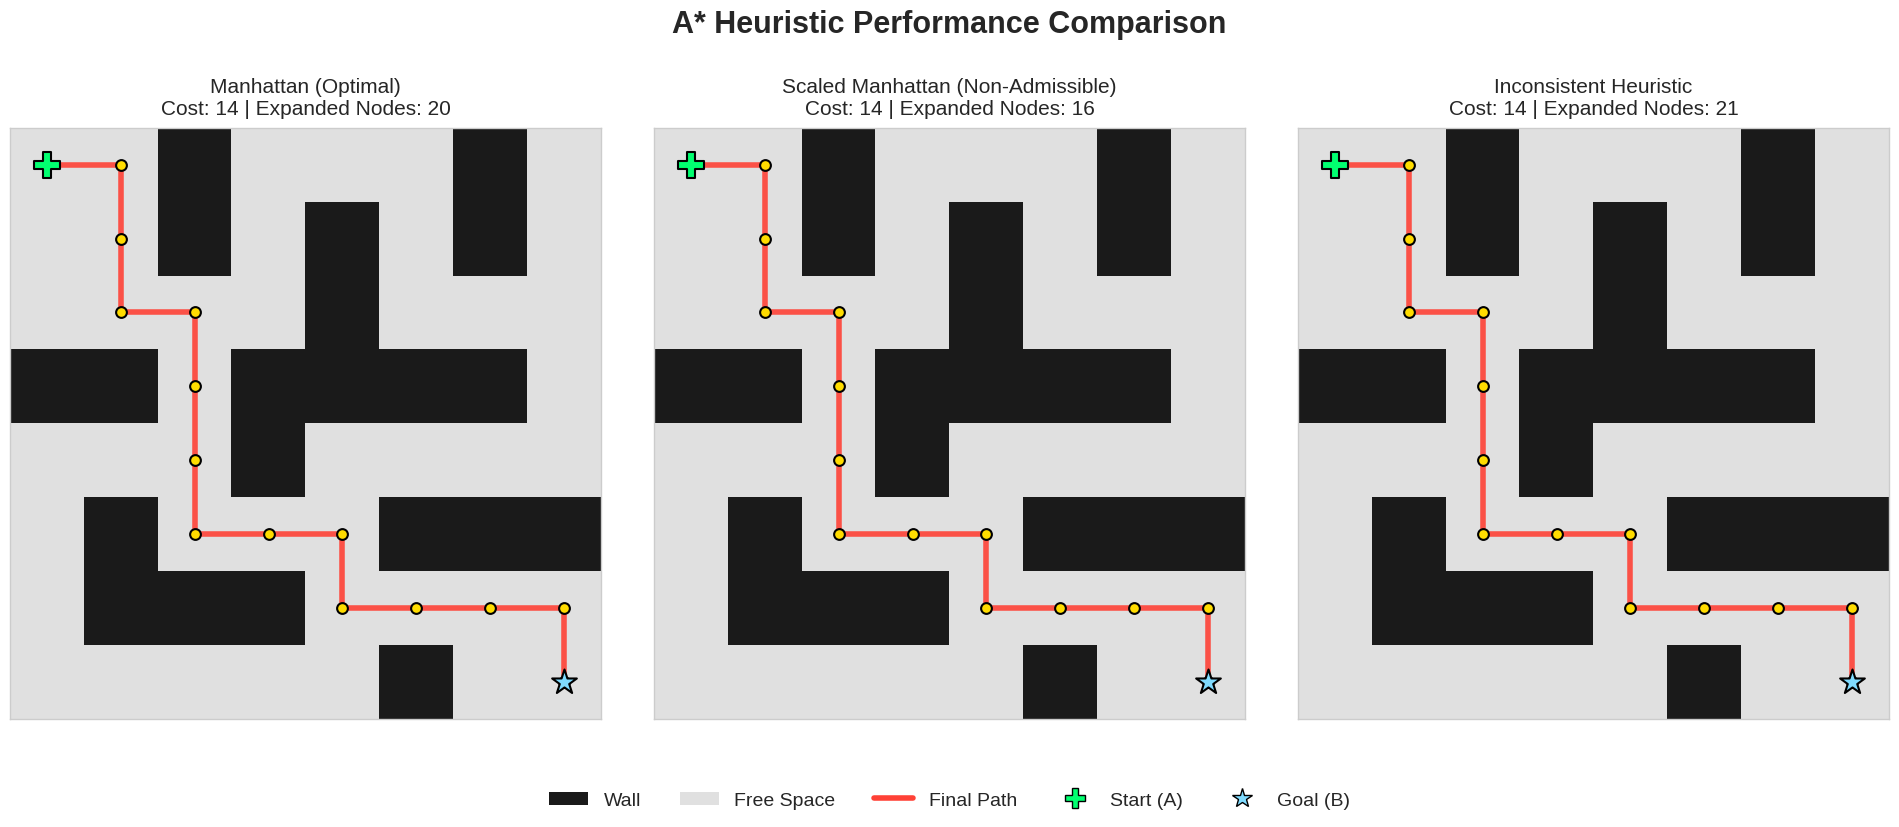

In [31]:
def visualize_heuristic_comparison(explorer, results_dict):
    """Creates a high-quality, side-by-side comparison plot for all heuristic results."""
    num_heuristics = len(results_dict)
    fig, axes = plt.subplots(1, num_heuristics, figsize=(num_heuristics * 6.5, 7.5))
    fig.suptitle('A* Heuristic Performance Comparison', fontsize=22, fontweight='bold', y=1.02)

    # Define a visually appealing color scheme
    # Using hex codes for precise color control
    color_map = ListedColormap(['#1A1A1A', '#E0E0E0']) # Dark Gray for walls, Light Gray for paths

    for ax, (name, data) in zip(axes, results_dict.items()):
        # Prepare the grid for plotting (0 for wall, 1 for path)
        plot_grid = (np.array(explorer.grid) != '1').astype(float)

        ax.imshow(plot_grid, cmap=color_map, interpolation='nearest')

        # Plot the final path if one was found
        if data['path']:
            path = data['path']
            y, x = zip(*path) # Unzip coordinates for plotting

            # Draw a bold line for the path
            ax.plot(x, y, color='#FF4136', linewidth=4, alpha=0.9, solid_capstyle='round', label='A* Path') # Bright Red

            # Add stylish markers on each step of the path
            ax.scatter(x, y, color='#FFDC00', s=60, zorder=3, edgecolor='black', linewidth=1.5) # Bright Yellow

        # Mark the start and goal points with distinct, large markers
        sy, sx = explorer.start_node
        gy, gx = explorer.goal_node
        ax.scatter(sx, sy, color='#01FF70', s=350, marker='P', zorder=4, edgecolor='black', linewidth=1.5, label='Start') # Bright Green Plus
        ax.scatter(gx, gy, color='#7FDBFF', s=350, marker='*', zorder=4, edgecolor='black', linewidth=1.5, label='Goal')  # Bright Blue Star

        # Set a clear title for each subplot with performance metrics
        ax.set_title(f"{name}\nCost: {data['cost']} | Expanded Nodes: {data['expanded']}", fontsize=15, pad=10)
        ax.set_xticks([])
        ax.set_yticks([])

    # Create a single, clean legend for the entire figure
    legend_elements = [
        Patch(facecolor='#1A1A1A', label='Wall'),
        Patch(facecolor='#E0E0E0', label='Free Space'),
        plt.Line2D([0], [0], color='#FF4136', lw=4, label='Final Path'),
        plt.Line2D([0], [0], marker='P', color='#01FF70', label='Start (A)', markersize=15, linestyle='None', markeredgecolor='k'),
        plt.Line2D([0], [0], marker='*', color='#7FDBFF', label='Goal (B)', markersize=15, linestyle='None', markeredgecolor='k')
    ]
    fig.legend(handles=legend_elements, loc='lower center', ncol=5, fontsize=14, bbox_to_anchor=(0.5, -0.07))

    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()

# Generate the beautiful visualization!
visualize_heuristic_comparison(explorer, results)

### Step 6: Performance Metrics Bar Chart

A bar chart provides a clear, quantitative comparison of the number of nodes each heuristic needed to expand. This directly measures search efficiency.

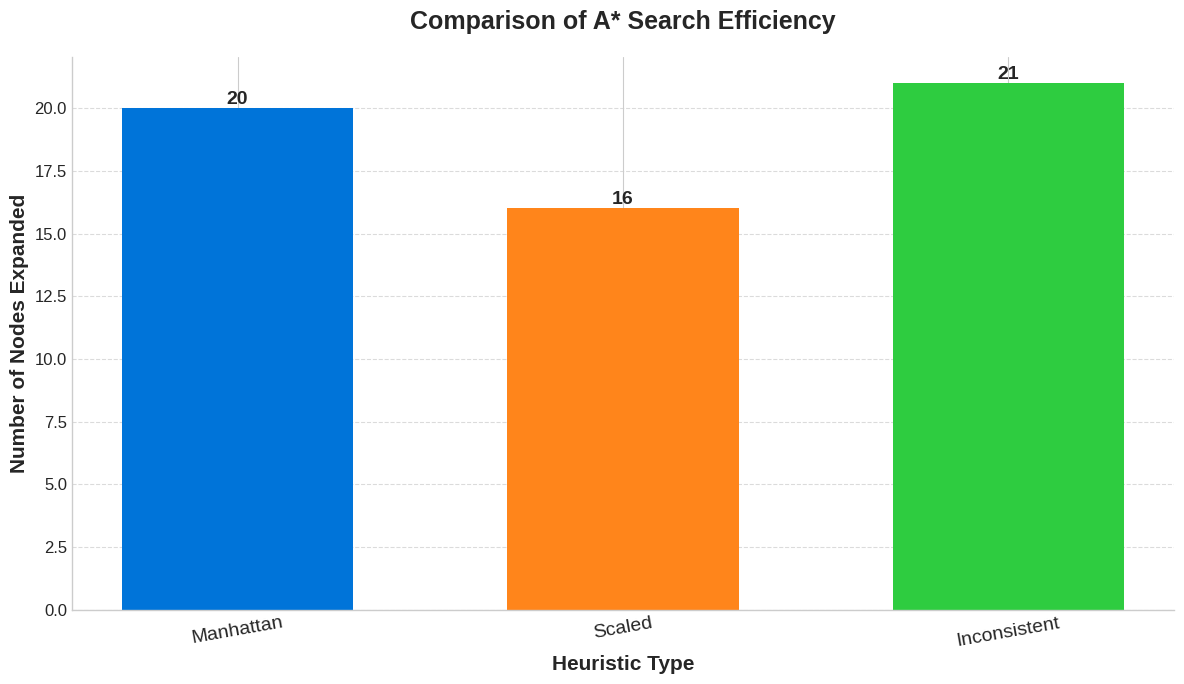

In [32]:
# Prepare data for the bar chart
heuristic_names = [name.split(' ')[0] for name in results.keys()]
expanded_node_counts = [data['expanded'] for data in results.values()]

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 7))
bar_colors = ['#0074D9', '#FF851B', '#2ECC40'] # Blue, Orange, Green
bars = ax.bar(heuristic_names, expanded_node_counts, color=bar_colors, width=0.6)

# Add professional labels and titles
ax.set_ylabel('Number of Nodes Expanded', fontsize=15, fontweight='bold')
ax.set_xlabel('Heuristic Type', fontsize=15, fontweight='bold')
ax.set_title('Comparison of A* Search Efficiency', fontsize=18, fontweight='bold', pad=20)
ax.tick_params(axis='x', labelsize=14, rotation=10)
ax.tick_params(axis='y', labelsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add data labels on top of each bar for clarity
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### Final Conclusion & Analysis

This analysis clearly demonstrates the impact of heuristic choice on the A* algorithm's behavior and performance:

1.  **Manhattan Distance (Optimal):** 🏆
    -   As expected, it found the guaranteed shortest path. It serves as our baseline for correctness and explores a moderate number of nodes to do so. It is the most reliable choice when optimality is required.

2.  **Scaled Manhattan (Non-Admissible):** 🚀
    -   This "greedy" heuristic was much more aggressive, expanding significantly fewer nodes. It rushes towards the goal based on its overestimated heuristic. While it happened to find the optimal path in *this specific maze*, this is **not guaranteed**. In another maze, it could have easily returned a longer, suboptimal path.

3.  **Inconsistent Heuristic:** 🤔
    -   This heuristic also found the optimal path because it remained **admissible** (it never overestimated the true cost). However, its inconsistency around the node `(4,4)` caused it to perform less efficiently than the standard Manhattan heuristic, as shown by the slightly higher number of expanded nodes.

Ultimately, for guaranteed optimality, an **admissible and consistent** heuristic like the Manhattan distance is the safest and most reliable choice.